In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# `Import data into Python environment.`

In [2]:
df= pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


# `Provide the trend chart for the number of complaints at monthly and daily granularity levels.`

In [4]:
# Converting to `datetime format`
df ['Date']= pd.to_datetime (df['Date'])
df ['Date_month_year']= pd.to_datetime (df['Date_month_year'])
df ['Time']= pd.to_datetime (df['Time'])

# Dropping the repeated `Date_month_year ` column.
df= df.drop('Date_month_year',axis=1)

## Creating new table df1 with Date & Customer complaint
df1=df[['Date','Customer Complaint']]

# Adding new 'Month' column to 'df1'
df1['Month']=df['Date'].dt.month
df1

C:\Users\harsh\AppData\Local\Temp\ipykernel_12036\694767487.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month']=df['Date'].dt.month


,Date,Customer Complaint,Month
0,2015-04-22,Comcast Cable Internet Speeds,4
1,2015-04-08,Payment disappear - service got disconnected,4
2,2015-04-18,Speed and Service,4
3,2015-05-07,Comcast Imposed a New Usage Cap of 300GB that ...,5
4,2015-05-26,Comcast not working and no service to boot,5
...,...,...,...
2219,2015-04-02,Service Availability,4
2220,2015-06-02,Comcast Monthly Billing for Returned Modem,6
2221,2015-06-09,complaint about comcast,6
2222,2015-06-23,Extremely unsatisfied Comcast customer,6


### Creating Chart

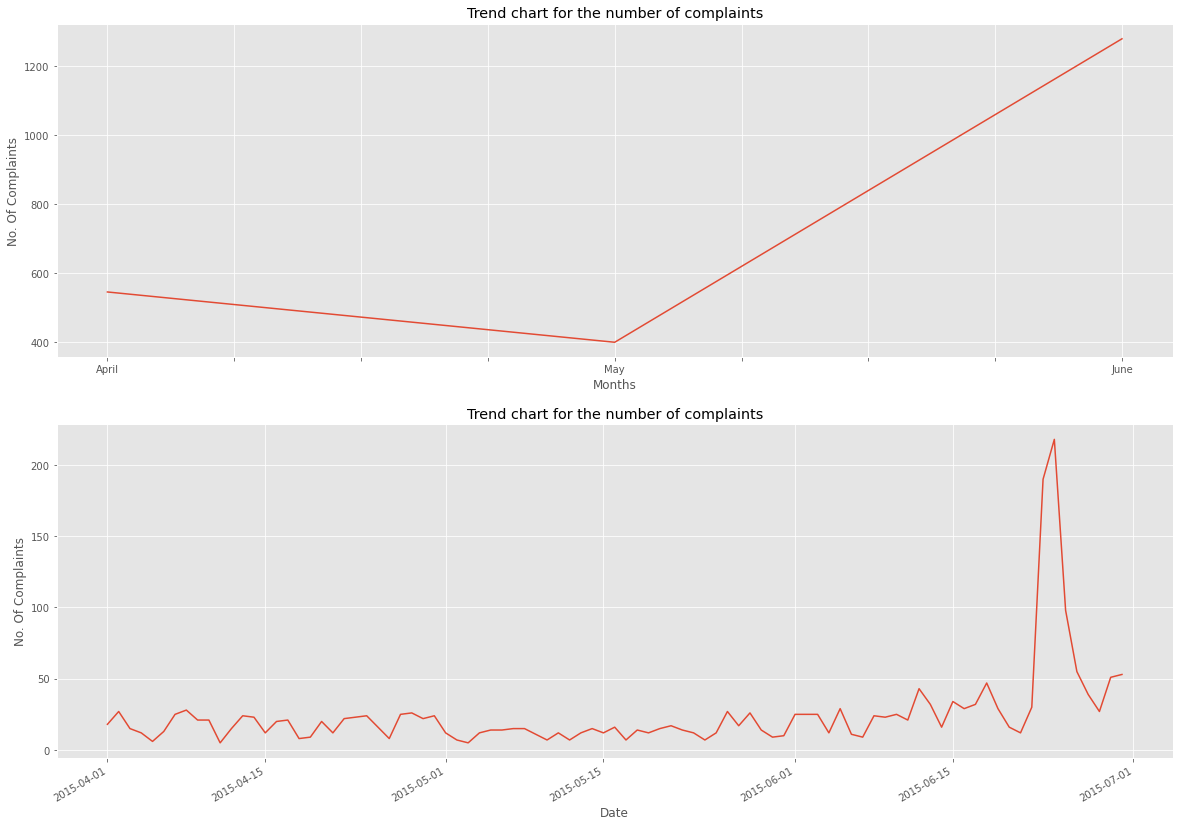

In [35]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
df1['Month'].value_counts(sort=False).rename(index={4:'April',5:'May',6:'June'}).plot()
plt.title('Trend chart for the number of complaints')
plt.xlabel('Months')
plt.ylabel('No. Of Complaints')


plt.subplot(2,1,2)
df["Date"].value_counts(sort=False).plot()
plt.title('Trend chart for the number of complaints')
plt.xlabel('Date')
plt.ylabel('No. Of Complaints')
plt.show()

# `Provide a table with the frequency of complaint types.`

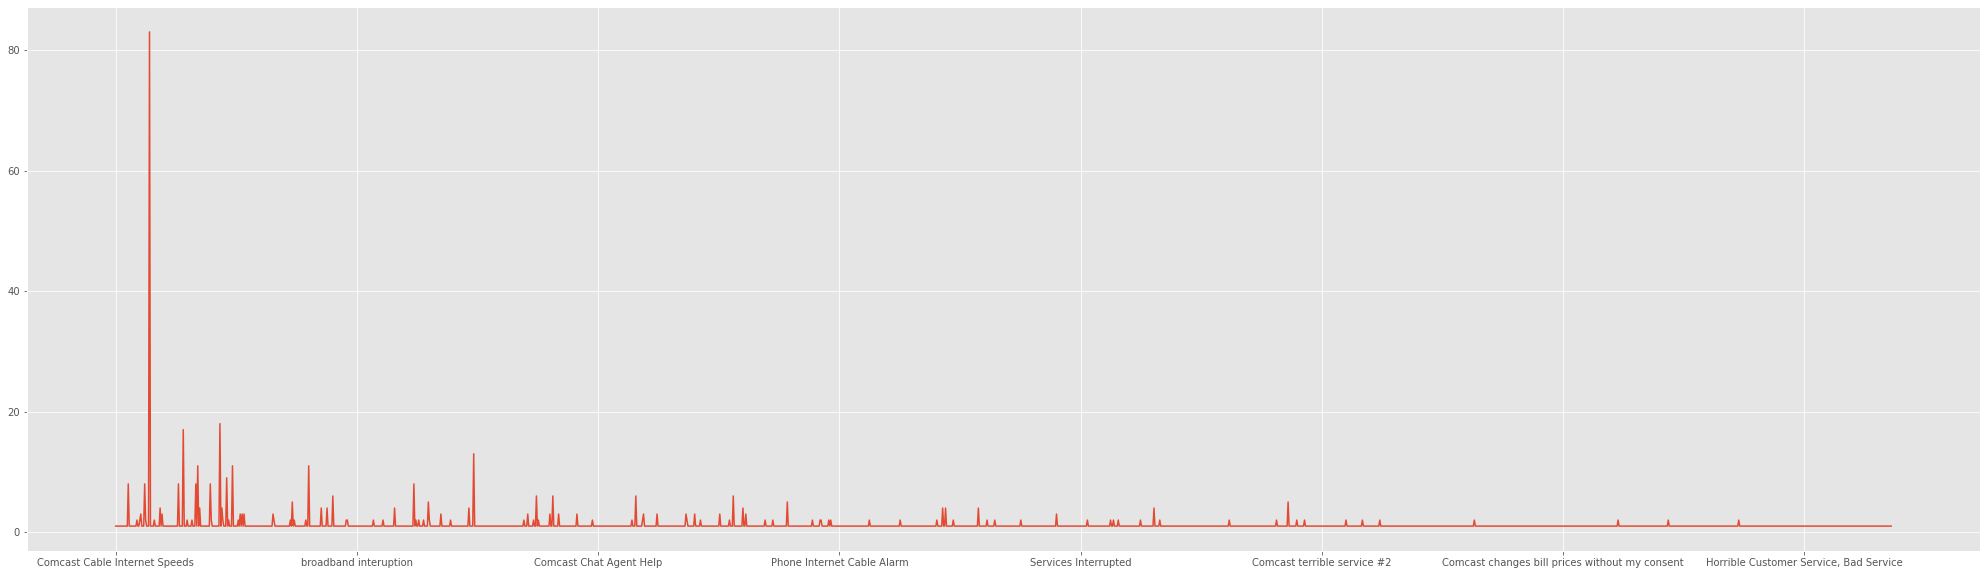

In [57]:
plt.figure(figsize=(35,10))
df['Customer Complaint'].value_counts(sort=False).plot(kind='line')
plt.show()

##  `Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.`

In [46]:
df["NewStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]
df

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Closed,Open,NewStatus
0,250635,Comcast Cable Internet Speeds,2015-04-22,2022-10-21 15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed,NaN,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,2022-10-21 10:22:56,Internet,Acworth,Georgia,30102,Closed,No,Closed,NaN,Closed
2,242732,Speed and Service,2015-04-18,2022-10-21 09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,Closed,NaN,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2022-10-21 11:59:35,Internet,Acworth,Georgia,30101,Open,Yes,NaN,Open,Open
4,307175,Comcast not working and no service to boot,2015-05-26,2022-10-21 13:25:26,Internet,Acworth,Georgia,30101,Solved,No,Solved,NaN,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,2022-10-21 09:13:18,Customer Care Call,Youngstown,Florida,32466,Closed,No,Closed,NaN,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,2022-10-21 13:24:39,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Solved,NaN,Closed
2221,331188,complaint about comcast,2015-06-09,2022-10-21 17:28:41,Internet,Ypsilanti,Michigan,48197,Solved,No,Solved,NaN,Closed
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,2022-10-21 23:13:30,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Solved,NaN,Closed


# `Provide state wise status of complaints in a stacked bar chart.`

In [49]:
Status_complaints = df.groupby(["State","NewStatus"]).size().unstack().fillna(0)
Status_complaints

NewStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:xlabel='State'>

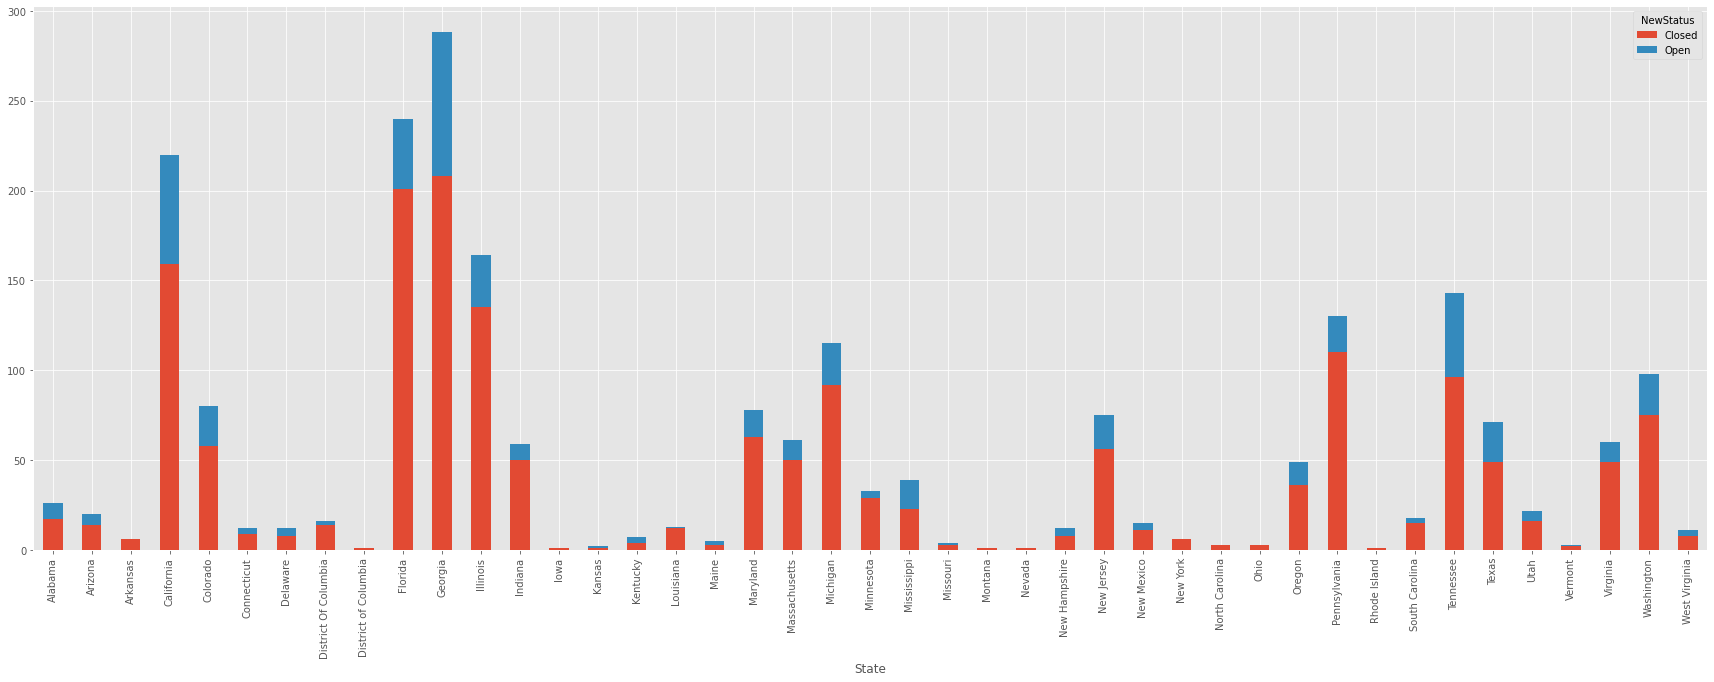

In [53]:
Status_complaints.plot(kind="bar", figsize=(30,10), stacked=True)

## `Q. Which state has the maximum complaints`
### As shown in the above Stacked bar graph maximum complaint is in "Georgia" State.

## `Q. Which state has the highest percentage of unresolved complaints`
### As shown in the above Stacked bar graph highest percentage of unresolved complaints is in "Georgia" State.

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [66]:
complaint_rece = df.groupby(['NewStatus','Received Via']).size().unstack().fillna(0)
complaint_rece

Received Via,Customer Care Call,Internet
NewStatus,,
Closed,864,843
Open,255,262


In [69]:
Internet = (complaint_rece['Internet'][0] / (complaint_rece['Internet'][0] + complaint_rece['Internet'][1]))*100
CustomerCareCall_resolved = (complaint_rece['Customer Care Call'][0] / (complaint_rece['Customer Care Call'][0] + complaint_rece['Customer Care Call'][1]))*100
print('Percentage of complaints resolved through Internet:',Internet,'%')
print('Percentage of complaints resolved through Customer Care Call:',CustomerCareCall_resolved,'%')

Percentage of complaints resolved through Internet: 76.289592760181 %
Percentage of complaints resolved through Customer Care Call: 77.21179624664879 %
